##Importing libraries

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
import re 
from sklearn.utils import shuffle
from urllib import request
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Importing Gutenberg books





In [ ]:
url_1= "https://www.gutenberg.org/files/1484/1484-0.txt"
url_2 = "https://www.gutenberg.org/cache/epub/19317/pg19317.txt"
url_3 = "https://www.gutenberg.org/cache/epub/10444/pg10444.txt"
url_4 = "https://www.gutenberg.org/files/559/559-0.txt"
url_5 = "https://www.gutenberg.org/files/3317/3317-0.txt"

In [ ]:
response_1= request.urlopen(url_1)
raw_1= response_1.read().decode('utf8')
raw_1 = raw_1.replace(raw_1[:1356],'')

response_2= request.urlopen(url_2)
raw_2= response_2.read().decode('utf8')
raw_2 = raw_2.replace(raw_2[:12285],'')

response_3= request.urlopen(url_3)
raw_3= response_3.read().decode('utf8')
raw_3 = raw_3.replace(raw_3[:5392],'')

response_4= request.urlopen(url_4)
raw_4= response_4.read().decode('utf8')
raw_4 = raw_4.replace(raw_4[:3156],'')

response_5= request.urlopen(url_5)
raw_5= response_5.read().decode('utf8')
raw_5 = raw_5.replace(raw_5[:2937],'')

In [ ]:
book_content = {'The Four Horsemen of the Apocalypse':raw_1,'Gallipoli Diary':raw_2 , 'The Peace Negotiations':raw_3, 'Greenmantle':raw_4, 'Now It Can Be Told':raw_5}
book_name = ['The Four Horsemen of the Apocalypse', 'Gallipoli Diary' , 'The Peace Negotiations', 'Greenmantle', 'Now It Can Be Told']
authors = ['Vicente Blasco Ibanez', 'Ian Hamilton' ,'Robert Lansing','John Buchan', 'Philip Gibbs']
genre = ['War I', 'War I','War I','War I','War I']
books = pd.DataFrame()
books['book_name'] = book_content.keys()
books['authors'] = authors
books['book_genre'] = genre
books['book_content'] = book_content.values()
books

,book_name,authors,book_genre,book_content
0,The Four Horsemen of the Apocalypse,Vicente Blasco Ibanez,War I,PART I\r\n\r\n\r\n\r\nCHAPTER I\r\n\r\nTHE TRY...
1,Gallipoli Diary,Ian Hamilton,War I,GALLIPOLI DIARY\r\n\r\n\r\n\r\nCHAPTER I\r\n\r...
2,The Peace Negotiations,Robert Lansing,War I,CHAPTER I\r\n\r\nREASONS FOR WRITING A PERSONA...
3,Greenmantle,John Buchan,War I,CHAPTER I.\r\nA Mission is Proposed\r\n\r\n\r\...
4,Now It Can Be Told,Philip Gibbs,War I,PART ONE. OBSERVERS AND COMMANDERS\r\n\r\n\r\n...


In [ ]:
books_input=[]
books_chosen =[]
books_no = int(input("Enter numbers of books: "))
print(books['book_name'])
for i in range (books_no):  
  x = input("kindly choose one book from the list, or press e to escape  ")
  if x in book_name:
    books_input.append(x)
    books_chosen.append(book_content[x])
  elif x == 'e':
    break
  else:
    print('sorry, invalid book name')
print('you have choosed these books :  ', books_input)
partition_no = input("Enter the number of partitions: ")
word_no = input("Enter the number of words: ")

Enter numbers of books: 5
0    The Four Horsemen of the Apocalypse
1                        Gallipoli Diary
2                 The Peace Negotiations
3                            Greenmantle
4                     Now It Can Be Told
Name: book_name, dtype: object
kindly choose one book from the list, or press e to escape  The Four Horsemen of the Apocalypse
kindly choose one book from the list, or press e to escape  Gallipoli Diary
kindly choose one book from the list, or press e to escape  The Peace Negotiations
kindly choose one book from the list, or press e to escape  Greenmantle
kindly choose one book from the list, or press e to escape  Now It Can Be Told
you have choosed these books :   ['The Four Horsemen of the Apocalypse', 'Gallipoli Diary', 'The Peace Negotiations', 'Greenmantle', 'Now It Can Be Told']
Enter the number of partitions: 200
Enter the number of words: 70


## Cleaning

In [ ]:
def Cleaning(books_chosen,books_input):
  #corpus = [] #creating empty list
  dict_1 ={}  #creating empty dictionary
#cleaning the books
  for i in range(len(books_input)):
      #removing all letters except a to z and A to Z
    clean = re.sub('[^a-zA-Z]', ' ', books_chosen[i])
      #converting all characters into lowercase
    clean = clean.lower()
      #removing whitespace
    clean = clean.strip()
      #spliting the words by whitespace
    clean = re.split(' ',clean)
      # removing all stop words and return the word into thier orignal
    clean = [word for word in clean if not word in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    clean = [lemmatizer.lemmatize(w) for w in clean]
      #puting corpus list into dictionary
    dict_1[i]=clean 
        #removing all "" from list
    dict_1[i] = [i for i in dict_1[i] if i]
  return dict_1

##Partitions

In [ ]:
def partitions(books_chosen,books_input,partition_no,word_no):
  df=pd.DataFrame()
  dict_1 = Cleaning(books_chosen,books_input)
  for key in range(len(books_input)):
    x=books_input[key]
    dict_1[x]=dict_1[key]
    del dict_1[key]  
    #make 200 partitions each partitions contain 100 words
  for x in books_input:
    df[x] = [dict_1[x][i*partition_no:i*partition_no+word_no] for i in range(partition_no)]
    #merging the 2 columns into one column
  df=df.stack().reset_index()
    #delete column level_0
  df.drop('level_0',inplace=True,axis=1)
    #rename the columns in dataframe
  df.rename(columns={0:"Words","level_1":"books name"},inplace=True)
  for i in range(len(df)):
    df.Words[i] = ' '.join(map(str,df.Words[i]))
  df = shuffle(df)
  return df

In [ ]:
data = partitions(books_chosen,books_input,int(partition_no),int(word_no))
data

,books name,Words
85,The Four Horsemen of the Apocalypse,night although twenty four hour yet passed des...
880,The Four Horsemen of the Apocalypse,nord every twenty four hour lessening radius t...
763,Greenmantle,offered protection lamented rasta brought pass...
812,The Peace Negotiations,imposed upon germany treaty versailles evident...
830,The Four Horsemen of the Apocalypse,heretofore never taken plucky little nation ac...
...,...,...
16,Gallipoli Diary,come troop finished musketry need squabble div...
734,Now It Can Be Told,alf rummaging souvenir half destroyed dugout d...
727,The Peace Negotiations,would seem valid argument could made favor sus...
199,Now It Can Be Told,colonel child writing opposite adjutant genera...


##Splitting train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['Words'],data['books name'],test_size=0.2,random_state =0)

##Transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1, 2))
x_train_bow = vectorizer.fit_transform(x_train).toarray()
x_test_bow = vectorizer.transform(x_test).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(ngram_range=(1,2))
x_train_tfid = tfidf.fit_transform(x_train).toarray()
x_test_tfid = tfidf.transform(x_test).toarray()

##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

##SVM model

1. BOW

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
classifier_svc_bow = SVC(kernel ='linear')
accuracies_svc_bow = cross_val_score(classifier_svc_bow, X=x_train_bow,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_svc_bow.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svc_bow.std()*100))

Accuracy: 95.25 %
Standard Deviation: 1.46 %


In [ ]:
classifier_svc_bow.fit(x_train_bow,y_train)
y_pred_svc_bow = classifier_svc_bow.predict(x_test_bow)
y_pred_svc_bow

array([0, 1, 2, 1, 0, 1, 3, 1, 2, 1, 4, 0, 0, 2, 0, 4, 4, 2, 3, 4, 3, 3,
       4, 2, 2, 0, 2, 0, 1, 3, 2, 3, 4, 4, 0, 1, 2, 2, 4, 4, 1, 2, 2, 3,
       3, 2, 2, 1, 4, 3, 0, 4, 4, 3, 2, 4, 3, 2, 1, 4, 3, 3, 2, 3, 2, 0,
       0, 3, 3, 4, 0, 3, 1, 3, 3, 2, 3, 0, 2, 4, 3, 4, 4, 3, 1, 0, 3, 2,
       2, 0, 1, 4, 2, 4, 2, 1, 2, 0, 1, 4, 1, 2, 4, 2, 2, 1, 4, 2, 0, 4,
       4, 0, 4, 2, 1, 3, 1, 2, 2, 1, 4, 1, 3, 2, 2, 3, 4, 1, 1, 2, 4, 1,
       4, 0, 2, 0, 1, 4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 3, 2, 2, 4, 4, 4,
       0, 4, 3, 0, 3, 2, 1, 0, 1, 1, 1, 0, 1, 4, 3, 0, 3, 3, 0, 2, 3, 4,
       4, 4, 3, 0, 4, 3, 2, 4, 4, 2, 4, 1, 2, 0, 1, 4, 0, 1, 3, 2, 2, 0,
       3, 3])

In [ ]:
y_test

array([0, 1, 2, 1, 0, 1, 3, 1, 2, 1, 4, 0, 0, 2, 0, 4, 4, 2, 3, 4, 3, 3,
       4, 2, 2, 0, 2, 0, 1, 3, 2, 3, 4, 4, 0, 1, 2, 2, 4, 4, 1, 2, 2, 3,
       3, 2, 2, 1, 4, 3, 0, 4, 4, 3, 2, 4, 3, 2, 1, 4, 3, 3, 2, 3, 2, 0,
       1, 3, 3, 4, 0, 3, 1, 3, 3, 2, 3, 0, 2, 4, 3, 4, 4, 3, 1, 0, 3, 2,
       2, 0, 1, 4, 2, 4, 2, 1, 2, 0, 1, 4, 1, 2, 4, 2, 2, 1, 4, 2, 0, 4,
       4, 0, 4, 2, 1, 3, 1, 2, 2, 1, 4, 1, 3, 2, 2, 1, 4, 1, 1, 2, 4, 1,
       4, 0, 2, 0, 1, 4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 3, 2, 2, 4, 4, 4,
       0, 4, 3, 0, 3, 2, 0, 0, 1, 1, 1, 0, 1, 4, 3, 0, 3, 3, 0, 2, 3, 4,
       4, 4, 3, 0, 4, 3, 2, 4, 4, 2, 4, 1, 2, 0, 1, 4, 0, 1, 3, 2, 2, 0,
       3, 3])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_svc_bow = confusion_matrix(y_test,y_pred_svc_bow)
print(cm_svc_bow)
accuracy_svc_bow=accuracy_score(y_test,y_pred_svc_bow)
accuracy_svc_bow

[[30  1  0  0  0]
 [ 1 37  0  1  0]
 [ 0  0 45  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 47]]


0.985

2.TFID

In [ ]:
classifier_svc_tfid = SVC(kernel ='linear')
accuracies_svc_tfid = cross_val_score(classifier_svc_tfid, X=x_train_tfid,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_svc_tfid.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svc_tfid.std()*100))

Accuracy: 96.88 %
Standard Deviation: 1.51 %


In [ ]:
classifier_svc_tfid = SVC(kernel ='linear')
classifier_svc_tfid.fit(x_train_tfid,y_train)
y_pred_svc_tfid = classifier_svc_tfid.predict(x_test_tfid)
y_pred_svc_tfid

array([0, 1, 2, 1, 0, 1, 3, 1, 2, 1, 4, 0, 0, 2, 0, 4, 4, 2, 3, 4, 3, 3,
       4, 2, 2, 0, 2, 0, 1, 3, 2, 3, 4, 4, 0, 1, 2, 2, 4, 4, 1, 2, 2, 3,
       3, 2, 2, 1, 4, 3, 0, 4, 4, 3, 2, 4, 3, 2, 1, 4, 3, 3, 2, 3, 2, 0,
       1, 3, 3, 4, 0, 3, 1, 3, 3, 2, 3, 0, 2, 4, 3, 4, 4, 3, 1, 0, 3, 2,
       2, 0, 1, 4, 2, 4, 2, 1, 2, 0, 1, 4, 1, 2, 4, 2, 2, 1, 4, 2, 0, 4,
       4, 0, 4, 2, 1, 3, 1, 2, 2, 1, 4, 1, 3, 2, 2, 1, 4, 1, 1, 2, 4, 1,
       4, 0, 2, 0, 1, 4, 1, 4, 1, 1, 1, 4, 3, 1, 0, 4, 3, 2, 2, 4, 4, 4,
       0, 4, 3, 0, 3, 2, 1, 0, 1, 1, 1, 0, 1, 4, 3, 0, 3, 3, 0, 2, 3, 4,
       4, 4, 3, 0, 4, 3, 2, 4, 4, 2, 4, 1, 2, 0, 1, 4, 0, 1, 3, 2, 2, 0,
       3, 3])

In [ ]:
cm_svc_tfid = confusion_matrix(y_test,y_pred_svc_tfid)
print(cm_svc_tfid)
accuracy_svc_tfid=accuracy_score(y_test,y_pred_svc_tfid)
accuracy_svc_tfid

[[30  1  0  0  0]
 [ 0 39  0  0  0]
 [ 0  0 45  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 47]]


0.995

##KNN model

1.BOW

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_bow = KNeighborsClassifier(n_neighbors =50, metric='minkowski', p=2)
accuracies_knn_bow = cross_val_score(classifier_knn_bow, X=x_train_bow,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_knn_bow.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn_bow.std()*100))

Accuracy: 84.25 %
Standard Deviation: 3.41 %


In [ ]:
classifier_knn_bow.fit(x_train_bow,y_train)
y_pred_knn_bow = classifier_knn_bow.predict(x_test_bow)

In [ ]:
cm_knn_bow = confusion_matrix(y_test,y_pred_knn_bow)
print(cm_knn_bow)
accuracy_knn_bow=accuracy_score(y_test,y_pred_knn_bow)
accuracy_knn_bow

[[31  0  0  0  0]
 [ 4 34  0  1  0]
 [ 6  3 35  1  0]
 [ 6  2  0 30  0]
 [ 4  0  0  0 43]]


0.865

2.TFID

In [ ]:
classifier_knn_tfid = KNeighborsClassifier(n_neighbors =50, metric='minkowski', p=2)
accuracies_knn_tfid = cross_val_score(classifier_knn_tfid, X=x_train_tfid,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_knn_tfid.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn_tfid.std()*100))

Accuracy: 94.50 %
Standard Deviation: 2.25 %


In [ ]:
classifier_knn_tfid.fit(x_train_tfid,y_train)
y_pred_knn_tfid = classifier_knn_tfid.predict(x_test_tfid)

In [ ]:
cm_knn_tfid = confusion_matrix(y_test,y_pred_knn_tfid)
print(cm_knn_tfid)
accuracy_knn_tfid=accuracy_score(y_test,y_pred_knn_tfid)
accuracy_knn_tfid

[[31  0  0  0  0]
 [ 2 37  0  0  0]
 [ 0  1 44  0  0]
 [ 0  0  3 34  1]
 [ 0  0  0  0 47]]


0.965

##Decision tree model

1.BOW

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt_bow = DecisionTreeClassifier(random_state =0)
accuracies_dt_bow = cross_val_score(classifier_dt_bow, X=x_train_bow,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_dt_bow.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt_bow.std()*100))

Accuracy: 72.38 %
Standard Deviation: 5.35 %


In [ ]:
classifier_dt_bow.fit(x_train_bow,y_train)
y_pred_dt_bow = classifier_dt_bow.predict(x_test_bow)

In [ ]:
cm_dt_bow = confusion_matrix(y_test,y_pred_dt_bow)
print(cm_dt_bow)
accuracy_dt_bow=accuracy_score(y_test,y_pred_dt_bow)
accuracy_dt_bow

[[18  5  2  5  1]
 [ 4 30  2  2  1]
 [ 3  8 30  4  0]
 [ 0  4  8 22  4]
 [ 0  1  0  2 44]]


0.72

2.TFID

In [ ]:
classifier_dt_tfid = DecisionTreeClassifier(random_state =0)
accuracies_dt_tfid = cross_val_score(classifier_dt_tfid, X=x_train_tfid,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_dt_tfid.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt_tfid.std()*100))

Accuracy: 70.00 %
Standard Deviation: 5.70 %


In [ ]:
classifier_dt_tfid.fit(x_train_tfid,y_train)
y_pred_dt_tfid = classifier_dt_tfid.predict(x_test_tfid)

In [ ]:
cm_dt_tfid = confusion_matrix(y_test,y_pred_dt_tfid)
print(cm_dt_tfid)
accuracy_dt_tfid=accuracy_score(y_test,y_pred_dt_tfid)
accuracy_dt_tfid

[[16  4  9  0  2]
 [ 2 26  8  3  0]
 [ 3  7 30  4  1]
 [ 1  6  7 20  4]
 [ 1  1  0  0 45]]


0.685

## Visualization

In [ ]:
y=np.array([accuracy_svc_bow.mean(),accuracies_svc_tfid.mean(),accuracies_knn_bow.mean(),accuracies_knn_tfid.mean(),accuracy_dt_bow.mean(),accuracies_dt_tfid.mean()])*100
y=pd.Series(y)
x=['SVM_BOW','SVM_TFID','KNN_BOW','KNN_TFID','DT_BOW','DT_TFID']
x=pd.Series(x)
result = pd.concat([x,y],1)
result.rename(columns={0:'Models',1:'Accuracy'},inplace=True)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """


,Models,Accuracy
0,SVM_BOW,98.500
1,SVM_TFID,96.875
2,KNN_BOW,84.250
3,KNN_TFID,94.500
4,DT_BOW,72.000
5,DT_TFID,70.000


Text(0.5, 1.0, 'Accuracy of each model')

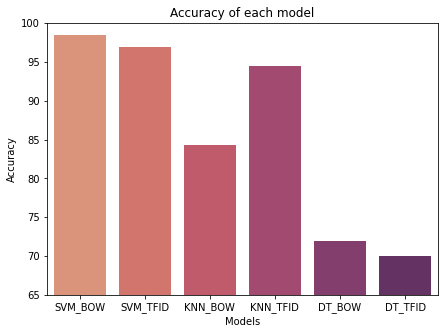

In [ ]:
from IPython.core.pylabtools import figsize
figsize(7,5)
sns.barplot(x=result['Models'],y=result['Accuracy'],data=result,palette='flare')
plt.ylim(65, 100)
plt.title("Accuracy of each model")

Text(0.5, 1.0, 'Most common words in Gallipoli Diary book')

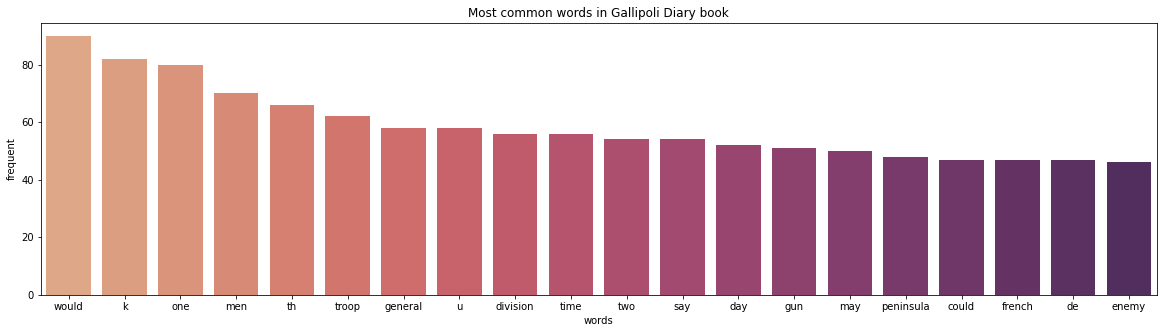

In [ ]:
from collections import Counter
book0=[data.iloc[i,1] for i in range(len(data)) if data.iloc[i,0]=='Gallipoli Diary']
book0=str(book0)
book0 = book0.split(" ")
book0 = Counter(book0).most_common(20)
book0 = pd.DataFrame(book0,columns=['words','frequent'])
figsize(20,5)
sns.barplot(x= 'words',y= 'frequent', data = book0, palette='flare')
plt.title("Most common words in Gallipoli Diary book")

Text(0.5, 1.0, 'Most common words in Greenmantle book')

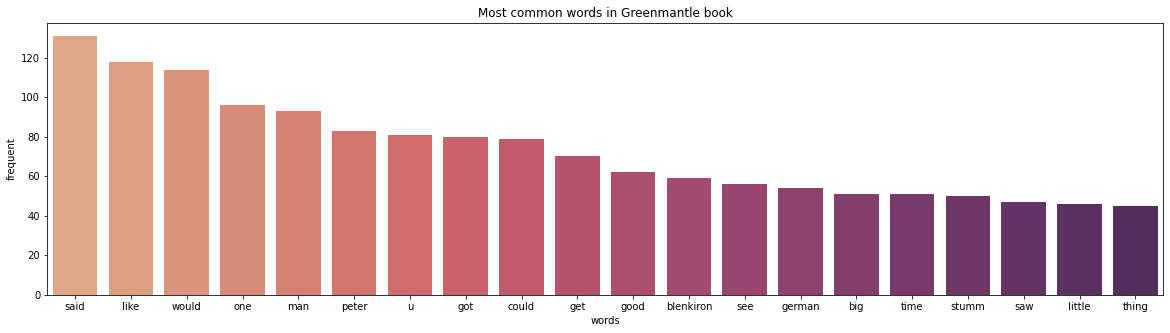

In [ ]:
book1=[data.iloc[i,1] for i in range(len(data)) if data.iloc[i,0]=='Greenmantle']
book1=str(book1)
book1 = book1.split(" ")
book1 = Counter(book1).most_common(20)
book1 = pd.DataFrame(book1,columns=['words','frequent'])
figsize(20,5)
sns.barplot(x= 'words',y= 'frequent', data = book1, palette='flare')
plt.title("Most common words in Greenmantle book")

Text(0.5, 1.0, 'Most common words in Now It Can Be Told book')

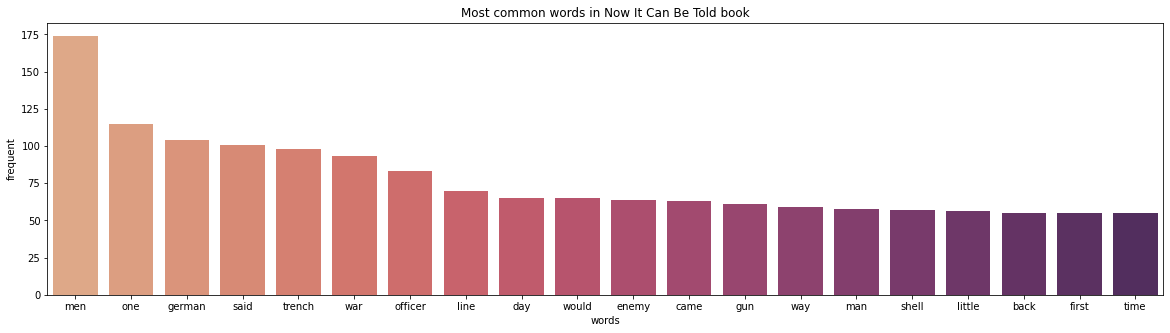

In [ ]:
book2=[data.iloc[i,1] for i in range(len(data)) if data.iloc[i,0]=='Now It Can Be Told']
book2=str(book2)
book2 = book2.split(" ")
book2 = Counter(book2).most_common(20)
book2 = pd.DataFrame(book2,columns=['words','frequent'])
figsize(20,5)
sns.barplot(x= 'words',y= 'frequent', data = book2, palette='flare')
plt.title("Most common words in Now It Can Be Told book")

Text(0.5, 1.0, 'Most common words in The Four Horsemen of the Apocalypse book')

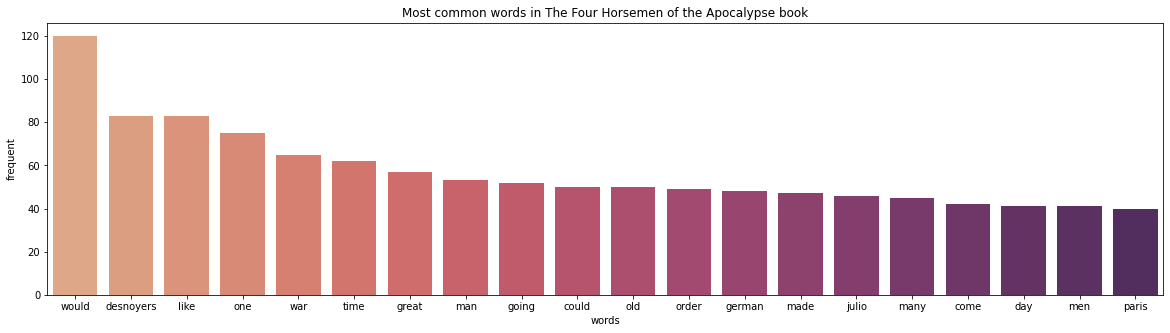

In [ ]:
book3=[data.iloc[i,1] for i in range(len(data)) if data.iloc[i,0]=='The Four Horsemen of the Apocalypse']
book3=str(book3)
book3 = book3.split(" ")
book3 = Counter(book3).most_common(20)
book3 = pd.DataFrame(book3,columns=['words','frequent'])
figsize(20,5)
sns.barplot(x= 'words',y= 'frequent', data = book3, palette='flare')
plt.title("Most common words in The Four Horsemen of the Apocalypse book")

Text(0.5, 1.0, 'Most common words in The Peace Negotiations book')

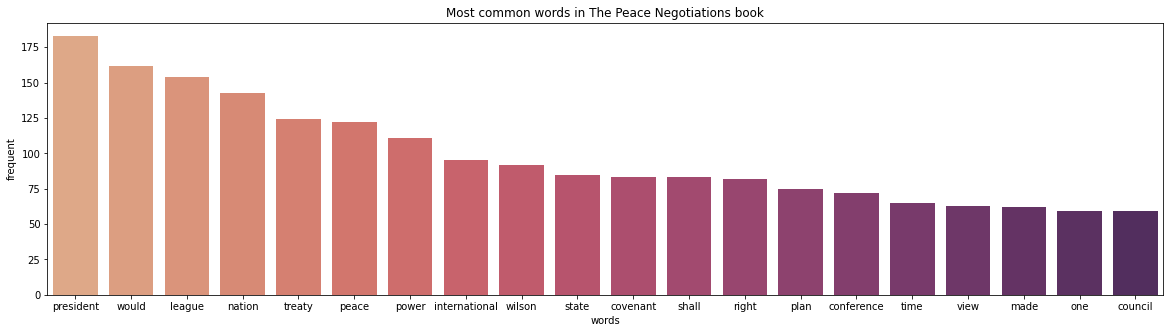

In [ ]:
book4=[data.iloc[i,1] for i in range(len(data)) if data.iloc[i,0]=='The Peace Negotiations']
book4=str(book4)
book4 = book4.split(" ")
book4 = Counter(book4).most_common(20)
book4 = pd.DataFrame(book4,columns=['words','frequent'])
figsize(20,5)
sns.barplot(x= 'words',y= 'frequent', data = book4, palette='flare')
plt.title("Most common words in The Peace Negotiations book")

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes_svc_tfid,train_scores_svc_tfid,test_scores_svc_tfid =learning_curve(classifier_svc_tfid,x_train_tfid,y_train,cv=10,scoring='accuracy')

In [ ]:
train_mean_svc_tfid=np.mean(train_scores_svc_tfid,axis=1)
train_std_svc_tfid=np.std(train_scores_svc_tfid,axis=1)
test_mean_svc_tfid=np.mean(test_scores_svc_tfid,axis=1)
test_std_svc_tfid=np.std(test_scores_svc_tfid,axis=1)

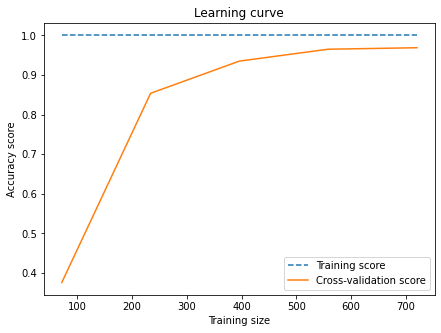

In [ ]:
figsize(7,5)
plt.plot(train_sizes_svc_tfid,train_mean_svc_tfid,'--',label="Training score")
plt.plot(train_sizes_svc_tfid,test_mean_svc_tfid,label="Cross-validation score")
plt.title("Learning curve")
plt.xlabel("Training size")
plt.ylabel("Accuracy score")
plt.legend(loc="best")

## Error analysis

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        47

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



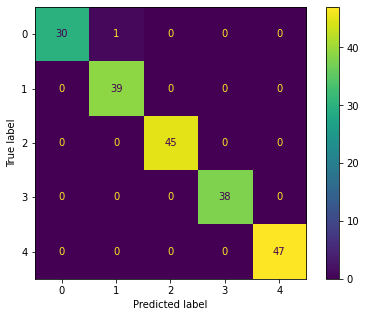

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
cr_svc_tfid = classification_report(y_test,y_pred_svc_tfid)
print(cr_svc_tfid)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_svc_tfid, display_labels = classifier_svc_tfid.classes_ )
disp.plot()

In [ ]:
accuracies_svc_tfid

array([0.9625, 0.975 , 0.975 , 0.9375, 0.9875, 0.95  , 0.975 , 0.9625,
       0.9875, 0.975 ])

In [ ]:
variance = np.var(y_pred_knn_tfid)
SSE = np.sum((np.mean(y_pred_svc_tfid)-y_test)**2)
bias =SSE - variance
print(" Variance: {:.2f} ".format(variance))
print("Bias: {:.2f}".format(bias))

 Variance: 1.96 
Bias: 382.24


In [ ]:
compare=np.concatenate([y_test.reshape(-1,1),y_pred_svc_tfid.reshape(-1,1)],1)
compare

array([[0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [4, 4],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [4, 4],
       [4, 4],
       [2, 2],
       [3, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [4, 4],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [3, 3],
       [2, 2],
       [3, 3],
       [4, 4],
       [4, 4],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [1, 1],
       [2, 2],
       [2, 2],
       [3, 3],
       [3, 3],
       [2, 2],
       [2, 2],
       [1, 1],
       [4, 4],
       [3, 3],
       [0, 0],
       [4, 4],
       [4, 4],
       [3, 3],
       [2, 2],
       [4, 4],
       [3, 3],
       [2, 2],
       [1, 1],
       [4, 4],
       [3, 3],
       [3, 3],
       [2, 2],
       [3, 3],
       [2, 2],
       [0, 0],
       [1,

In [ ]:
errors = [i for i in range(len(y_pred_svc_tfid)) if y_pred_svc_tfid[i]!=y_test[i]]
identify_error = np.array([i for i in compare[errors]])
identify_error

array([[0, 1]])

In [ ]:
errors

[160]

In [ ]:
x_test.iloc[17]

'earth faintly visible drifting cloud thick sluggish vapor edge battleground field tawny golden light autumn sun broken tower village church red roof shattered shell fire tree stripped bare leaf wind autumn touched painted clear outline gray blue sky gun invisible one battery massed wide stretch country could located battle searching glass bombardment began seemed though shell came every field village mile back behind line glitter bursting shell stabbed smoke explosion'

In [ ]:
df = pd.DataFrame()
df["Error words"] = np.array([x_test.iloc[i] for i in errors])
df["Actual output"] = identify_error[:,0]
df["Predicted output"] = identify_error[:,1]
df

,Error words,Actual output,Predicted output
0,never taken place never take place surmise req...,0,1


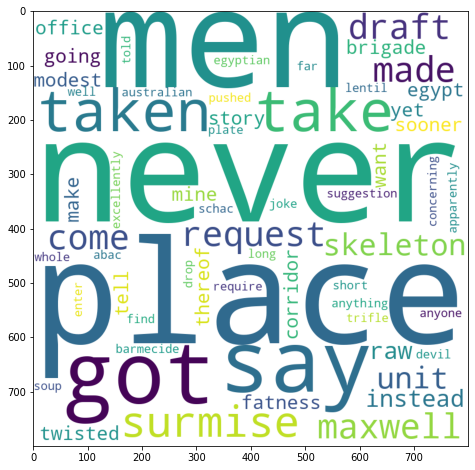

In [ ]:
from wordcloud import WordCloud
for i in range(len(df)):
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 10).generate(df["Error words"][i])
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud) 
  plt.show()

##Getting accuracy down 20%

In [ ]:
decrease_accuracy = partitions(books_chosen,books_input,200,10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(decrease_accuracy['Words'],decrease_accuracy['books name'],test_size=0.2,random_state =0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf  = TfidfVectorizer(ngram_range=(1,2))
x_train_tfid = tfidf.fit_transform(x_train).toarray()
x_test_tfid = tfidf.transform(x_test).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
classifier_svc_tfid = SVC(kernel ='linear')
accuracies_svc_tfid = cross_val_score(classifier_svc_tfid, X=x_train_tfid,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies_svc_tfid.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svc_tfid.std()*100))

Accuracy: 61.50 %
Standard Deviation: 7.50 %


In [ ]:
classifier_svc_tfid = SVC(kernel ='linear')
classifier_svc_tfid.fit(x_train_tfid,y_train)
y_pred_svc_tfid = classifier_svc_tfid.predict(x_test_tfid)

In [ ]:
cm_svc_tfid = confusion_matrix(y_test,y_pred_svc_tfid)
print(cm_svc_tfid)
accuracy_svc_tfid=accuracy_score(y_test,y_pred_svc_tfid)
accuracy_svc_tfid

[[23  5  1  5  1]
 [ 8 27  7  8  2]
 [ 3  1 26 10  0]
 [ 2  3  2 19  1]
 [ 0  0  0  0 46]]


0.705

In [ ]:
variance = np.var(y_pred_knn_tfid)
SSE = np.mean((np.mean(y_pred_svc_tfid)-y_test)**2)
bias =SSE - variance
print(" Variance: {:.2f} ".format(variance))
print("Bias: {:.2f}".format(bias))

 Variance: 1.96 
Bias: 0.09


              precision    recall  f1-score   support

           0       0.64      0.66      0.65        35
           1       0.75      0.52      0.61        52
           2       0.72      0.65      0.68        40
           3       0.45      0.70      0.55        27
           4       0.92      1.00      0.96        46

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.69       200
weighted avg       0.72      0.70      0.70       200



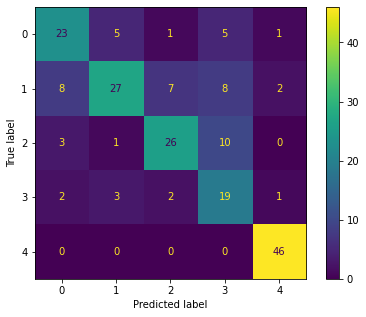

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
cr_svc_tfid = classification_report(y_test,y_pred_svc_tfid)
print(cr_svc_tfid)
disp = ConfusionMatrixDisplay(confusion_matrix =cm_svc_tfid, display_labels = classifier_svc_tfid.classes_ )
disp.plot()